In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [15]:
B = 200
N = 20
X = np.random.randn(N)

In [16]:
individual_estimates = np.empty(B)
for b in range(B):
    sample = np.random.choice(X, size=N)
    individual_estimates[b] = sample.mean()
print(individual_estimates.shape)

(200,)


In [17]:
b_mean = individual_estimates.mean()
b_std = individual_estimates.std()
lower = b_mean + norm.ppf(0.025) * b_std  # ppf(0.025) = -1.96
upper = b_mean + norm.ppf(0.975) * b_std  # ppf(0.975) = +1.96

Traditional way to calculate Confident Interval

In [18]:
lower2 = X.mean() + norm.ppf(0.025) * X.std() / np.sqrt(N)
upper2 = X.mean() + norm.ppf(0.975) * X.std() / np.sqrt(N)

In [19]:
print("boostrap mean of X", b_mean)
print("Sample mean of X:", X.mean())

boostrap mean of X -0.5582819900871869
Sample mean of X: -0.5577285075218575


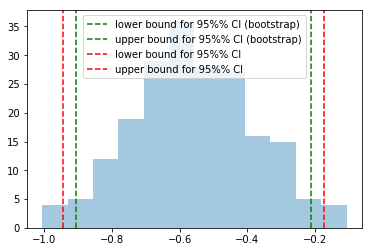

In [40]:
sns.distplot(individual_estimates, kde=False)
plt.axvline(x=lower, linestyle='--', color='g', label="lower bound for 95%% CI (bootstrap)")
plt.axvline(x=upper, linestyle='--', color='g', label="upper bound for 95%% CI (bootstrap)")
plt.axvline(x=lower2, linestyle='--', color='r', label="lower bound for 95%% CI")
plt.axvline(x=upper2, linestyle='--', color='r', label="upper bound for 95%% CI")
plt.legend()
